# Nueral network classifier  for Hand written images

In [6]:
# important Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from tensorflow import keras

In [7]:
# Loading sign image data from tensor flow
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

### Dimentions_of_data

In [8]:
print(f'Shape of the X_train is :{X_train.shape}')
print(f'Shape of the X_test is :{X_test.shape}')
print(f'Shape of the y_train is :{y_train.shape}')
print(f'Shape of the y_test is :{y_test.shape}')

Shape of the X_train is :(60000, 28, 28)
Shape of the X_test is :(10000, 28, 28)
Shape of the y_train is :(60000,)
Shape of the y_test is :(10000,)


### How image looks like

Label is 5


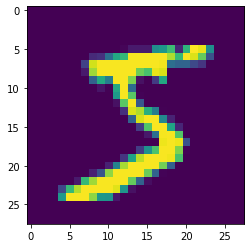

In [9]:
print(f'Label is {y_train[0]}')
plt.imshow(X_train[0])
plt.show()

### How arrays Looks like

In [10]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Flattening Datasets

In [11]:
X_train_flattened = X_train.reshape((len(X_train),28*28))
X_test_flattened = X_test.reshape((len(X_test),28*28))

In [12]:
print(f'shape of X_train_flattened is : {X_train_flattened.shape}')
print(f'shape of X_test_flattened is : {X_test_flattened.shape}')

shape of X_train_flattened is : (60000, 784)
shape of X_test_flattened is : (10000, 784)


Label is : 5


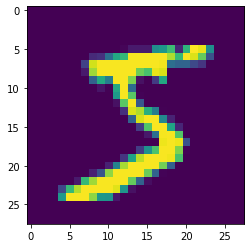

In [17]:
print(f'Label is : {y_train[0]}')
plt.imshow(X_train_flattened[0,:].reshape(28,28))

In [37]:
y_train_flattened = pd.get_dummies(y_train)
y_test_flattened = pd.get_dummies(y_test)
print(f'shape of y_train is : {y_train_flattened.shape}')
print(f'shape of y_test is : {y_test_flattened.shape}')
y_train_flattened = np.array(y_train_flattened)
y_tets_flattened = np.array(y_test_flattened)


shape of y_train is : (60000, 10)
shape of y_test is : (10000, 10)


### Normalizing Dataset

In [49]:
X_train_flattened = X_train_flattened/255
X_test_flattened = X_test_flattened/255

### Creating Model : Dense Model

In [50]:
from keras import models
from keras.layers import Dense, Dropout

model = models.Sequential()
model.add(Dense(512, input_shape = (28*28,), activation = 'relu'))
model.add(Dropout(0.7))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.6))
model.add(Dense(10,activation = 'softmax'))

### compile Model 

In [51]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

### Training Model

In [54]:
model.fit(X_train_flattened,y_train_flattened,
          epochs = 16,
         batch_size = 1024)

Epoch 1/16
59/59 [==============================] - 2s 38ms/step - loss: 0.4118 - accuracy: 0.8763
Epoch 2/16
59/59 [==============================] - 2s 38ms/step - loss: 0.3873 - accuracy: 0.8855
Epoch 3/16
59/59 [==============================] - 2s 37ms/step - loss: 0.3713 - accuracy: 0.8914
Epoch 4/16
59/59 [==============================] - 2s 39ms/step - loss: 0.3531 - accuracy: 0.8963
Epoch 5/16
59/59 [==============================] - 2s 38ms/step - loss: 0.3396 - accuracy: 0.8999
Epoch 6/16
59/59 [==============================] - 2s 38ms/step - loss: 0.3297 - accuracy: 0.9025
Epoch 7/16
59/59 [==============================] - 2s 38ms/step - loss: 0.3139 - accuracy: 0.9087
Epoch 8/16
59/59 [==============================] - 2s 38ms/step - loss: 0.3041 - accuracy: 0.9108
Epoch 9/16
59/59 [==============================] - 2s 40ms/step - loss: 0.2936 - accuracy: 0.9151
Epoch 10/16
59/59 [==============================] - 2s 38ms/step - loss: 0.2845 - accuracy: 0.9174
Epoch 11/

## Model Summery

In [58]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


### Model Visualize

In [59]:
import visualkeras
visualkeras.layered_view(model)

### Model Evaluation

In [62]:
score = model.evaluate(X_test_flattened, y_test_flattened)
print(f'Test Loss is : {score[0]}')
print(f'Test Accuracy is : {score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1694 - accuracy: 0.9476
Test Loss is : 0.1694047898054123
Test Accuracy is : 0.9476000070571899
